# Project 6<br><span style='color:coral'>**Customer Service Requests Analysis**
Name of the contributer : Rajeev Vhanhuve

**DESCRIPTION**<br>
You've been asked to perform data analysis of service request (311) calls from New York City. You've also been asked to utilize data wrangling techniques to understand the pattern in the data and visualize the major types of complaints.

**Perform the following steps:**
1. Understand the dataset:
   1. Identify the shape of the dataset
   2. Identify variables with null values
2. Perform basic data exploratory analysis:
   1. Utilize missing value treatment
   2. Analyze the date column and remove the entries if it has an incorrect timeline
   3. Draw a frequency plot for city-wise complaints
   4. Draw scatter and hexbin plots for complaint concentration across Brooklyn
3. Find major types of complaints:
   1. Plot a bar graph of count vs. complaint types
   2. Find the top 10 types of complaints
   3. Display the types of complaints in each city in a separate dataset
4. Visualize the major types of complaints in each city
5. Check if the average response time across various types of complaints
6. Identify significant variables by performing a statistical analysis using p-values and chi-square values (Optional)

# <span style='color:coral'>**Solution**

#### Importing libraries
> - Pandas is a Python library for data manipulation and analysis.
> - Numpy is a package that contains a multidimensional array object and several derivative ones.
> - Matplotlib is a Python visualization package for 2D array plots.
> - Seaborn is built on top of Matplotlib. It's used for exploratory data analysis and data visualization.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from dateutil.relativedelta import relativedelta
from datetime import date

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#### 1. Understand the dataset:

In [2]:
# Import the dataset
df = pd.read_csv('311_Service_Requests_from_2010_to_Present.csv', parse_dates=['Created Date', 'Closed Date'])

In [3]:
# Visualize the dataset
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,2015-12-31 23:59:45,2016-01-01 00:55:15,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,2015-12-31 23:59:44,2016-01-01 01:26:57,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,2015-12-31 23:59:29,2016-01-01 04:51:03,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,2015-12-31 23:57:46,2016-01-01 07:43:13,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,2015-12-31 23:56:58,2016-01-01 03:24:42,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [4]:
#Print the columns of the DataFrame
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

##### A. Identify the shape of the dataset

In [5]:
df.shape

(364558, 53)

In [6]:
# Print all the other important information about the DataFrame, such as Datatype and Count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364558 entries, 0 to 364557
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   Unique Key                      364558 non-null  int64         
 1   Created Date                    364558 non-null  datetime64[ns]
 2   Closed Date                     362177 non-null  datetime64[ns]
 3   Agency                          364558 non-null  object        
 4   Agency Name                     364558 non-null  object        
 5   Complaint Type                  364558 non-null  object        
 6   Descriptor                      358057 non-null  object        
 7   Location Type                   364425 non-null  object        
 8   Incident Zip                    361560 non-null  float64       
 9   Incident Address                312859 non-null  object        
 10  Street Name                     312859 non-null  object 

##### B. Identify variables with null values

In [7]:
df.isnull().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2381
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          6501
Location Type                        133
Incident Zip                        2998
Incident Address                   51699
Street Name                        51699
Cross Street 1                     57188
Cross Street 2                     57805
Intersection Street 1             313438
Intersection Street 2             314046
Address Type                        3252
City                                2997
Landmark                          364183
Facility Type                       2389
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2402
Community Board                        0
Borough         

#### 2. Perform basic data exploratory analysis:

In [8]:
# Replace the special characters that are not needed in the DataFrame
df.columns= df.columns.str.replace(" ", "_")

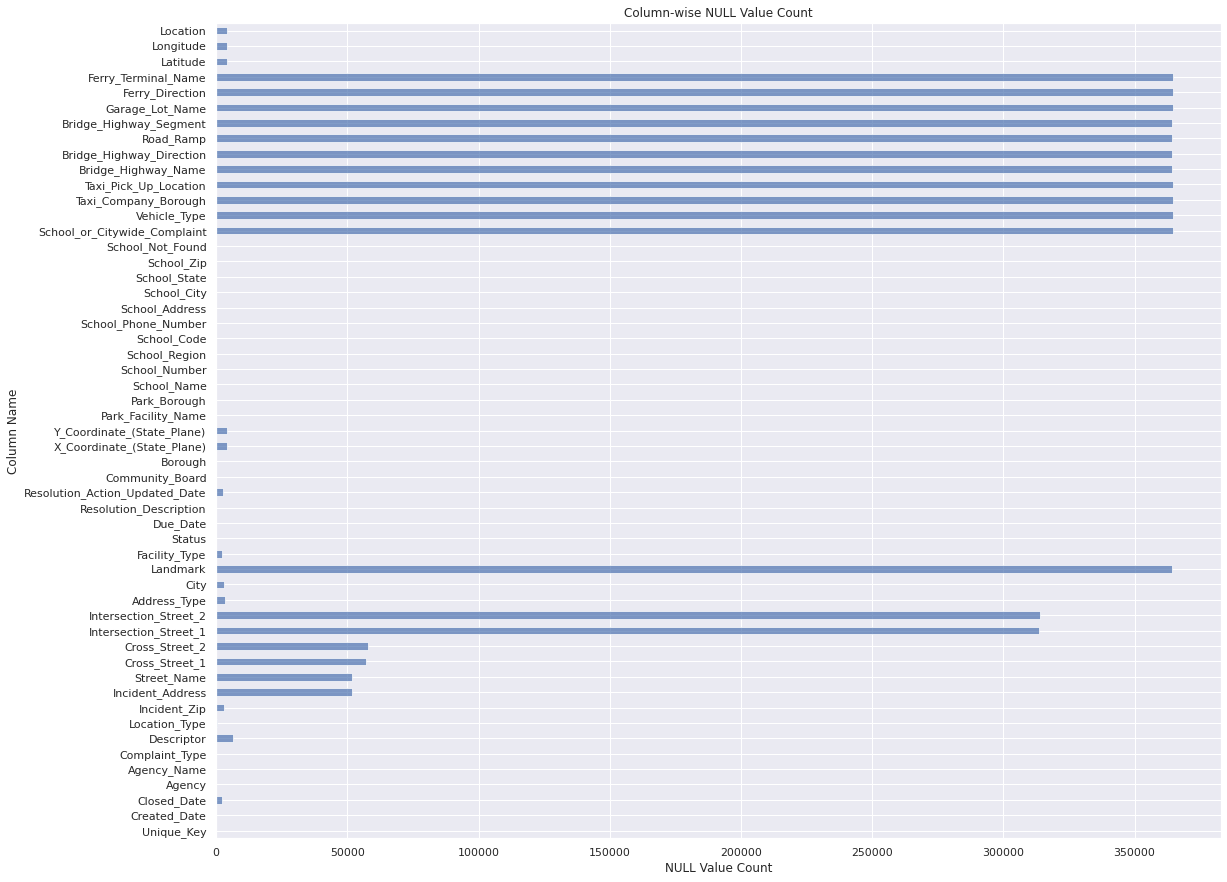

In [9]:
# Draw a frequency plot to show the number of null values in each column of the DataFrame
sns.set()
df.isnull().sum().plot(kind='barh', alpha= 0.7, figsize= (18,15), title="Column-wise NULL Value Count")
plt.xlabel('NULL Value Count')
plt.ylabel('Column Name')
plt.show()

##### <span style='color:green'>Observations:
<span style='color:green'>- The bar shows the NA values in the columns.<br>
<span style='color:green'>- Most of the columns, from `Ferry Terminal Name` to `School- or City-wide Complaint` have a very large number of null values.

In [10]:
# Checking some specific columns where we cannot afford any null values
df[['Closed_Date', 'Created_Date']].isnull().sum()

Closed_Date     2381
Created_Date       0
dtype: int64

##### A. Utilize missing value treatment

In [11]:
# Remove the records whose Closed Date values are null
df = df[pd.notnull(df['Closed_Date'])]

In [12]:
df[['Closed_Date', 'Created_Date']].isnull().sum()

Closed_Date     0
Created_Date    0
dtype: int64

##### <span style='color:green'>There are now zero null values in the Closed Date column.

##### B. Analyze the date column and remove the entries if it has an incorrect timeline

In [13]:
# Time elapsed in closed and creation date
a=(df.Created_Date[0] - df.Closed_Date[0])
a.seconds

83070

In [14]:
df['Request_Closing_Time']=  df.Closed_Date - df.Created_Date

In [15]:
# Convert the calculated date to seconds to get a better representation
df['Request_Closing_Time']=df['Request_Closing_Time']/np.timedelta64(1,'s')
df['Request_Closing_Time'].head()

0     3330.0
1     5233.0
2    17494.0
3    27927.0
4    12464.0
Name: Request_Closing_Time, dtype: float64

In [16]:
# View the descriptive statistics for the newly created column
df['Request_Closing_Time'].describe()

count    3.621770e+05
mean     1.511330e+04
std      2.110255e+04
min      6.100000e+01
25%      4.533000e+03
50%      9.616000e+03
75%      1.887800e+04
max      2.134342e+06
Name: Request_Closing_Time, dtype: float64

In [17]:
df['Request_Closing_Time'].mean()

15113.299632500131

In [18]:
# Check the number of null values in `Complaint_Type` and `City` columns
df[['City', 'Complaint_Type']].isnull().sum()

City              674
Complaint_Type      0
dtype: int64

*There are around 674 NA Values in the city columns*

In [19]:
# Let's impute the NA value with Unknown City
df['City'].fillna('Unknown City', inplace= True)
df[['City', 'Complaint_Type']].isnull().sum()

City              0
Complaint_Type    0
dtype: int64

##### C. Draw a frequency plot for city-wise complaints

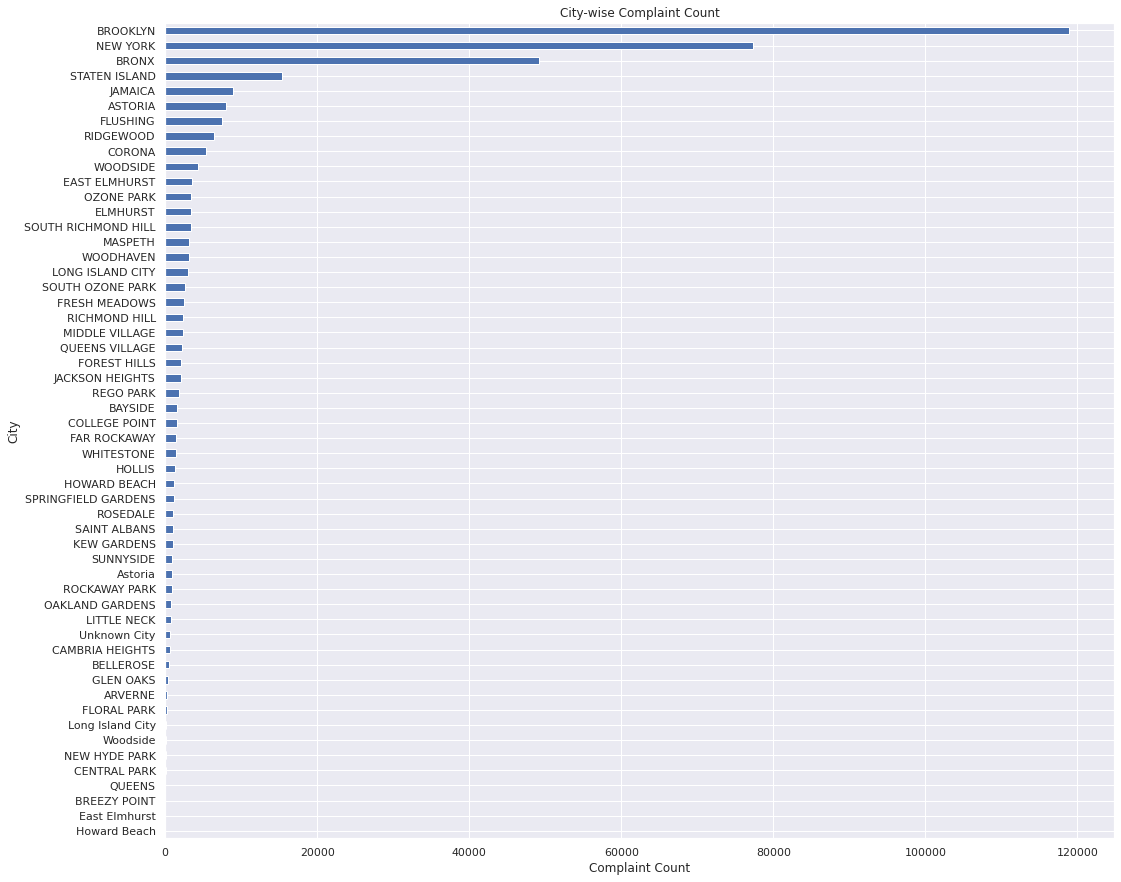

In [20]:
sns.set()
df['City'].value_counts().sort_values(ascending= True).plot(kind= 'barh', figsize=(17,15), title="City-wise Complaint Count")
plt.xlabel('Complaint Count')
plt.ylabel('City')
plt.show()

##### <span style='color:green'>Observation:<br><span style='color:green'>- Brooklyn and New York have the highest number of complaints.

In [21]:
# Let us review Brooklyn's complaint information
brooklyn_data = df[df['City']=='BROOKLYN']
brooklyn_data.head(20)[['Unique_Key','Agency_Name','Complaint_Type','Descriptor','City','Longitude','Latitude']]

,Unique_Key,Agency_Name,Complaint_Type,Descriptor,City,Longitude,Latitude
5,32306554,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,BROOKLYN,-73.992568,40.660823
9,32308391,New York City Police Department,Blocked Driveway,No Access,BROOKLYN,-73.999539,40.623793
13,32305074,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,BROOKLYN,-73.874505,40.687511
17,32310273,New York City Police Department,Noise - Commercial,Loud Music/Party,BROOKLYN,-73.983430,40.679154
18,32306617,New York City Police Department,Noise - Commercial,Loud Music/Party,BROOKLYN,-73.930202,40.616550
22,32307233,New York City Police Department,Noise - Commercial,Loud Music/Party,BROOKLYN,-73.936568,40.614784
29,32308850,New York City Police Department,Noise - Commercial,Loud Music/Party,BROOKLYN,-73.984379,40.691599
30,32310297,New York City Police Department,Noise - Commercial,Loud Music/Party,BROOKLYN,-73.949372,40.681870
31,32308054,New York City Police Department,Noise - Commercial,Loud Music/Party,BROOKLYN,-73.984379,40.691599
36,32306281,New York City Police Department,Blocked Driveway,No Access,BROOKLYN,-73.935556,40.670843


##### D. Draw scatter and hexbin plots for complaint concentration across Brooklyn

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


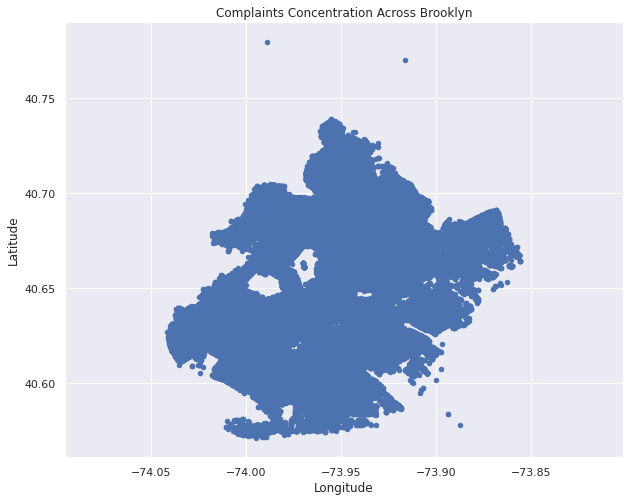

In [22]:
brooklyn_data[['Longitude', 'Latitude']].plot(kind='scatter', 
                                         x='Longitude', 
                                         y='Latitude', 
                                         figsize=(10,8), 
                                         title = 'Complaints Concentration Across Brooklyn'
                                        ).axis('equal')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

##### <span style='color:green'>Observations:<br><span style='color:green'>- The scatter plot is inconclusive as it is just one color.<br>- <span style='color:green'>The hexbin plot is a better indicator of the concentration of complaints in this scenario.

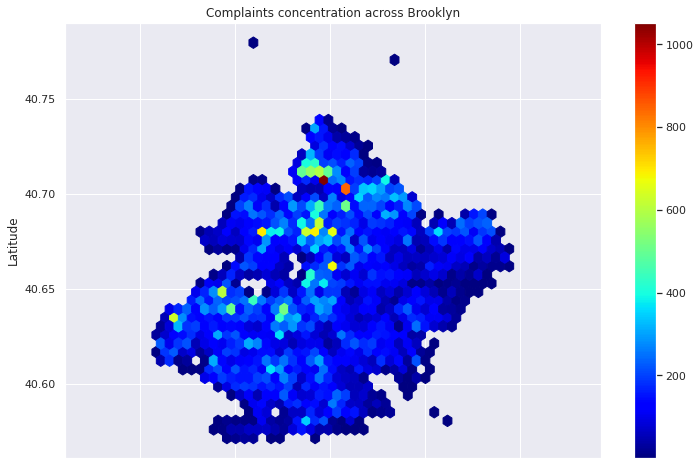

In [23]:
# Hexbin plot to visualize the complaint concetration across Brooklyn
brooklyn_data.plot(kind='hexbin', 
              x='Longitude', 
              y='Latitude', 
              gridsize=40,
              colormap = 'jet',
              mincnt=1,
              title = 'Complaints concentration across Brooklyn',
              figsize=(12,8)
             ).axis('equal')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

##### <span style='color:green'>Observations:<br><span style='color:green'>- The red color indicates that Brooklyn has the highest number of complaints.<br><span style='color:green'>- As we go down the color scale, from red to blue, the number of complaints decreases.

#### 3. Find major types of complaints:

##### A. Plot a bar graph of count vs. complaint types

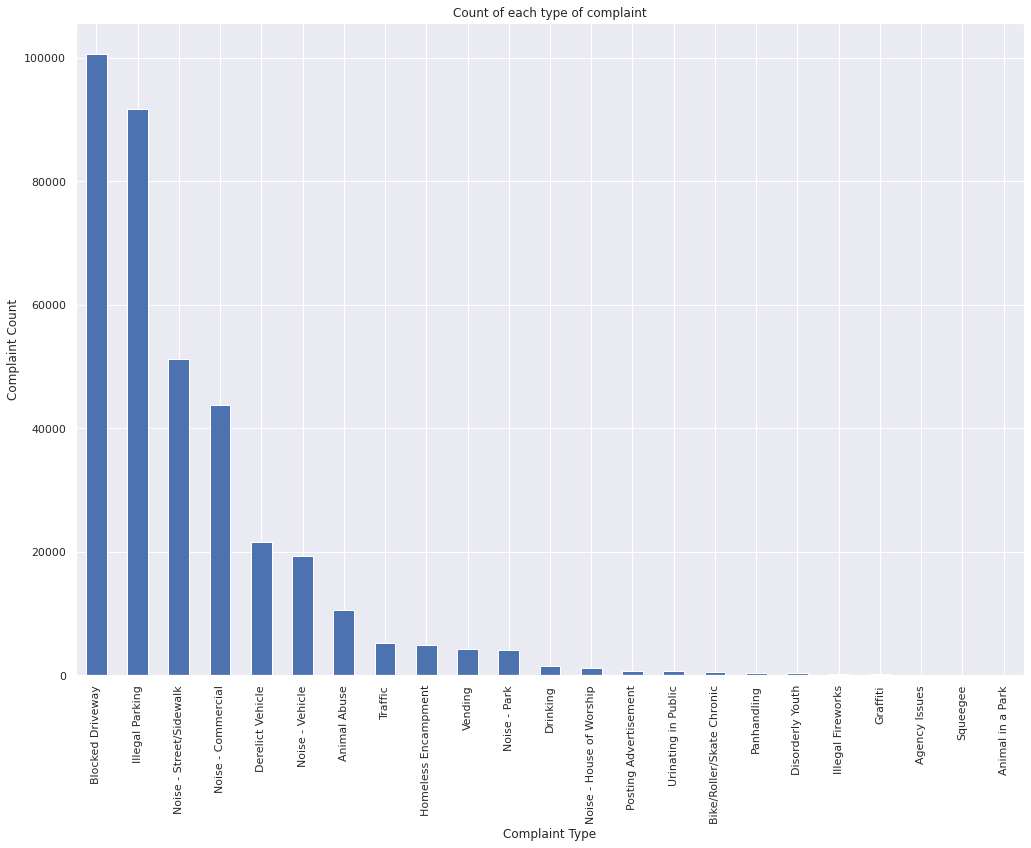

In [24]:
sns.set()
df['Complaint_Type'].value_counts().plot(kind= 'bar', figsize=(17,12), title="Count of each type of complaint")
plt.xlabel('Complaint Type')
plt.ylabel('Complaint Count')
plt.show()

##### <span style='color:green'>Observation:<br>- Most complaints are of blocked driveways and illegal parking.

In [25]:
df['City'].unique()

array(['NEW YORK', 'ASTORIA', 'BRONX', 'ELMHURST', 'BROOKLYN',
       'KEW GARDENS', 'JACKSON HEIGHTS', 'MIDDLE VILLAGE', 'REGO PARK',
       'SAINT ALBANS', 'JAMAICA', 'SOUTH RICHMOND HILL', 'Unknown City',
       'RIDGEWOOD', 'HOWARD BEACH', 'FOREST HILLS', 'STATEN ISLAND',
       'OZONE PARK', 'RICHMOND HILL', 'WOODHAVEN', 'FLUSHING', 'CORONA',
       'QUEENS VILLAGE', 'OAKLAND GARDENS', 'HOLLIS', 'MASPETH',
       'EAST ELMHURST', 'SOUTH OZONE PARK', 'WOODSIDE', 'FRESH MEADOWS',
       'LONG ISLAND CITY', 'ROCKAWAY PARK', 'SPRINGFIELD GARDENS',
       'COLLEGE POINT', 'BAYSIDE', 'GLEN OAKS', 'FAR ROCKAWAY',
       'BELLEROSE', 'LITTLE NECK', 'CAMBRIA HEIGHTS', 'ROSEDALE',
       'SUNNYSIDE', 'WHITESTONE', 'ARVERNE', 'FLORAL PARK',
       'NEW HYDE PARK', 'CENTRAL PARK', 'BREEZY POINT', 'QUEENS',
       'Astoria', 'Long Island City', 'Woodside', 'East Elmhurst',
       'Howard Beach'], dtype=object)

In [26]:
# Check the frequency of various types of complaints for New York city
df.loc[df['City']== 'NEW YORK']['Complaint_Type'].value_counts()

Noise - Street/Sidewalk      22245
Noise - Commercial           18686
Illegal Parking              14549
Noise - Vehicle               6294
Homeless Encampment           3060
Blocked Driveway              2705
Vending                       2638
Animal Abuse                  1941
Traffic                       1769
Noise - Park                  1243
Derelict Vehicle               695
Drinking                       321
Urinating in Public            264
Bike/Roller/Skate Chronic      254
Noise - House of Worship       222
Panhandling                    206
Disorderly Youth                81
Posting Advertisement           49
Illegal Fireworks               38
Graffiti                        25
Squeegee                         4
Name: Complaint_Type, dtype: int64

Blocked driveway has the maximum frequency of the listed complaints. Check the value of the top ten types of complaints.

#### B. Find the top 10 types of complaints

In [27]:
df['Complaint_Type'].value_counts()[0:10]

Blocked Driveway           100624
Illegal Parking             91716
Noise - Street/Sidewalk     51139
Noise - Commercial          43751
Derelict Vehicle            21518
Noise - Vehicle             19301
Animal Abuse                10530
Traffic                      5196
Homeless Encampment          4879
Vending                      4185
Name: Complaint_Type, dtype: int64

In [28]:
top10_complaints= np.array(df['Complaint_Type'].value_counts()[0:10].index)
top10_complaints

array(['Blocked Driveway', 'Illegal Parking', 'Noise - Street/Sidewalk',
       'Noise - Commercial', 'Derelict Vehicle', 'Noise - Vehicle',
       'Animal Abuse', 'Traffic', 'Homeless Encampment', 'Vending'],
      dtype=object)

#### C. Display the types of complaints in each city in a separate dataset

In [29]:
# Create a DataFrame `df_new`, which contains cities as columns and complaint types in rows
df_new= pd.DataFrame()

In [30]:
for i in df['City'].unique():
    df_new[i]= df.loc[df['City']== i]['Complaint_Type'].value_counts()

In [31]:
df_new.head()

,NEW YORK,ASTORIA,BRONX,ELMHURST,BROOKLYN,KEW GARDENS,JACKSON HEIGHTS,MIDDLE VILLAGE,REGO PARK,SAINT ALBANS,...,FLORAL PARK,NEW HYDE PARK,CENTRAL PARK,BREEZY POINT,QUEENS,Astoria,Long Island City,Woodside,East Elmhurst,Howard Beach
Noise - Street/Sidewalk,22245,409.0,9144.0,228.0,13982.0,13.0,238.0,38.0,64.0,81.0,...,3.0,NaN,105.0,1.0,6.0,145.0,28.0,5.0,NaN,NaN
Noise - Commercial,18686,1653.0,2944.0,85.0,13855.0,203.0,619.0,13.0,82.0,36.0,...,3.0,4.0,NaN,4.0,6.0,310.0,19.0,2.0,NaN,NaN
Illegal Parking,14549,1340.0,9889.0,760.0,33532.0,276.0,240.0,1104.0,640.0,237.0,...,72.0,32.0,5.0,16.0,10.0,277.0,64.0,124.0,28.0,NaN
Noise - Vehicle,6294,236.0,3556.0,69.0,5965.0,23.0,75.0,45.0,60.0,50.0,...,2.0,2.0,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN
Homeless Encampment,3060,32.0,275.0,34.0,948.0,5.0,11.0,5.0,6.0,11.0,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN


#### 4. Visualize the major types of complaints in each city

Will draw another chart that shows the types of complaints in each city in a single chart, where diffrent colors show the different types of complaints
- This type of chart is known as the stacked bar chart

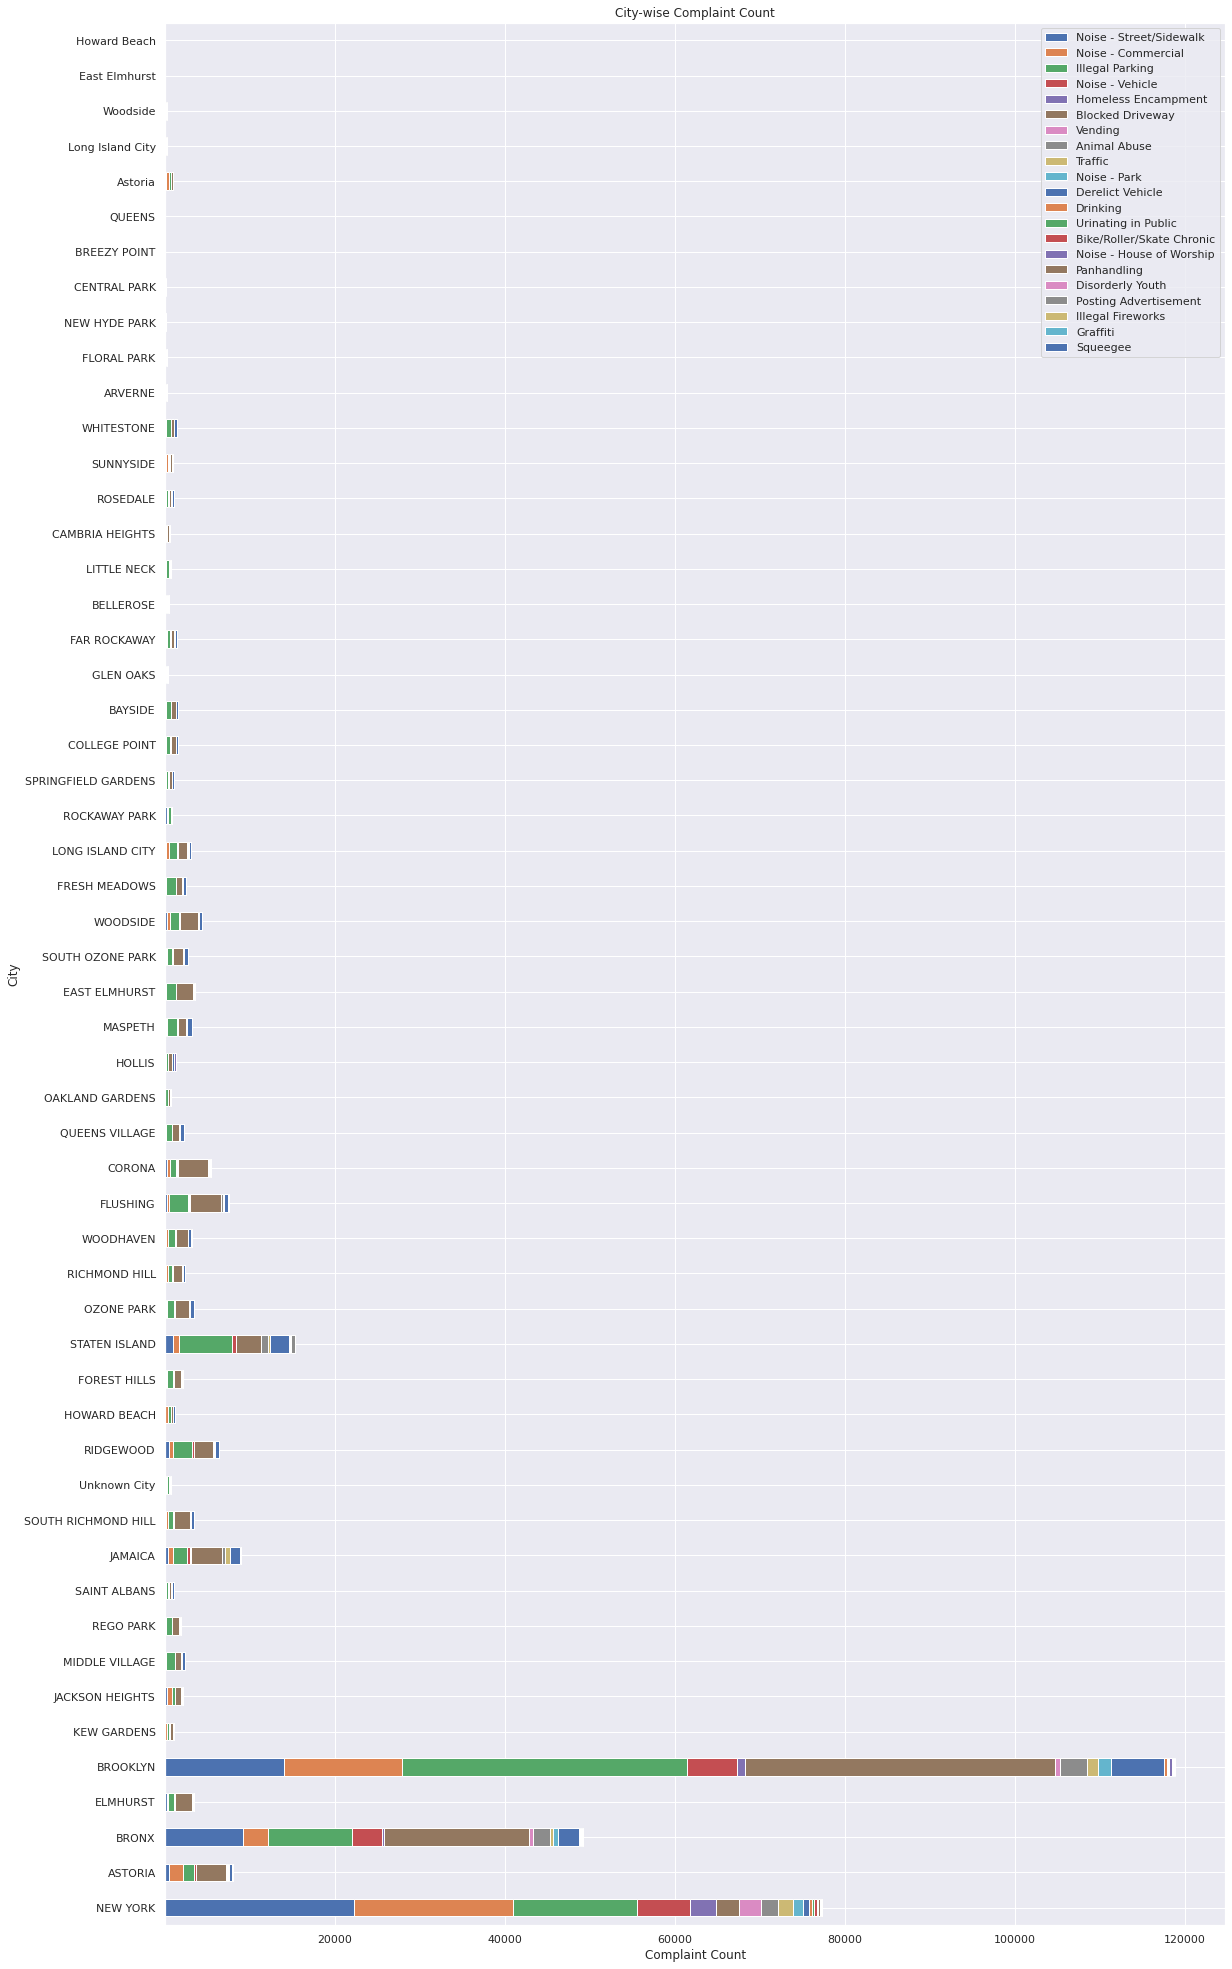

In [32]:
sns.set()
df_new.T.plot(kind= 'barh', stacked= True, figsize= (19, 35), title="City-wise Complaint Count")
plt.xlabel('Complaint Count')
plt.ylabel('City')
plt.show()

##### <span style='color:green'>Observations:<br><span style='color:green'>- The above graph indicates different colors for various types of complaints in a city.<br><span style='color:green'>- You can see that Brookyn has the highest crime rate with Blocked Driveaway having the maximum occurance shown in brown.


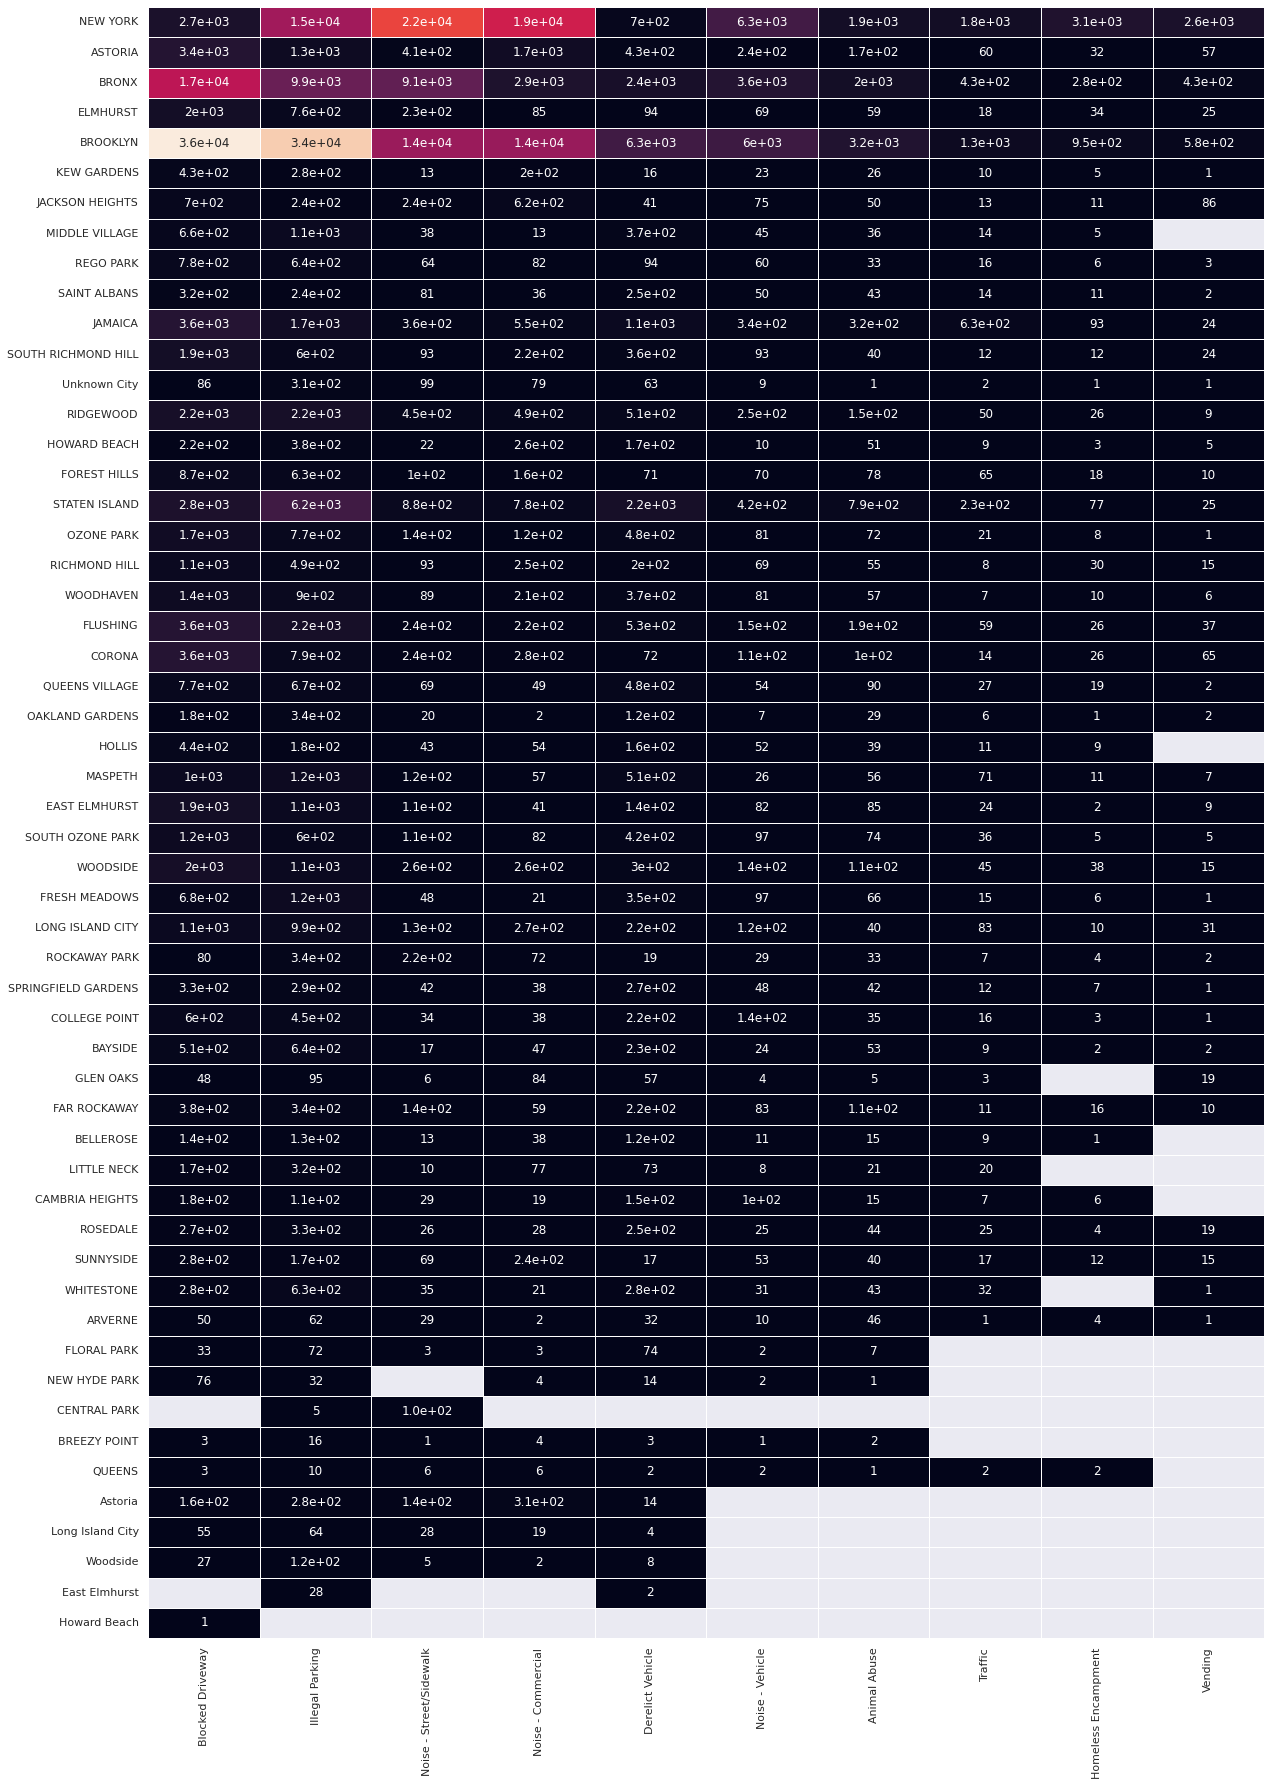

In [33]:
# Heat Map for top 10 types of Complaints in each city
df_new_T= df_new.T
sns.set()
f, ax = plt.subplots(figsize=(20, 30))
sns.heatmap(df_new_T[top10_complaints], annot=True, cbar=False, linewidths=.8, ax=ax)
plt.show()

##### <span style='color:green'>Observations:<br><span style='color:green'>- When we map Brooklyn with the Blocked Driveaway, "we see that the color for that combination is light".<br><span style='color:green'>- This means that light color "shows the maximum correlation between two entities".<br><span style='color:green'>- As we go up (dark) in the scale of color, the correlation is minimum.<br><span style='color:green'>- Blank spaces show the absence of that complaint type in a particular city.

In [34]:
# Sort the complaint types based on the average `Request_Closing_Time` grouping them for different locations.
df.groupby(['City', 'Complaint_Type'], sort= True).Request_Closing_Time.mean()

City      Complaint_Type         
ARVERNE   Animal Abuse                8399.195652
          Blocked Driveway            8318.840000
          Derelict Vehicle           11394.000000
          Disorderly Youth           12928.500000
          Drinking                     859.000000
                                         ...     
Woodside  Blocked Driveway           15566.185185
          Derelict Vehicle           19994.500000
          Illegal Parking            17293.459677
          Noise - Commercial          8619.000000
          Noise - Street/Sidewalk    12285.600000
Name: Request_Closing_Time, Length: 792, dtype: float64

#### 5. Check if the average response time across various types of complaints

In [35]:
df.groupby(['Complaint_Type'], sort= True).Request_Closing_Time.mean()

Complaint_Type
Agency Issues                1.828912e+04
Animal Abuse                 1.803256e+04
Animal in a Park             1.212634e+06
Bike/Roller/Skate Chronic    1.312369e+04
Blocked Driveway             1.623252e+04
Derelict Vehicle             2.535960e+04
Disorderly Youth             1.236375e+04
Drinking                     1.382130e+04
Graffiti                     2.327634e+04
Homeless Encampment          1.545138e+04
Illegal Fireworks            1.011348e+04
Illegal Parking              1.565044e+04
Noise - Commercial           1.108576e+04
Noise - House of Worship     1.139109e+04
Noise - Park                 1.222606e+04
Noise - Street/Sidewalk      1.223130e+04
Noise - Vehicle              1.256180e+04
Panhandling                  1.585355e+04
Posting Advertisement        7.286256e+03
Squeegee                     1.456025e+04
Traffic                      1.230912e+04
Urinating in Public          1.295929e+04
Vending                      1.436628e+04
Name: Request_Closi

In [36]:
df.Request_Closing_Time.describe()

count    3.621770e+05
mean     1.511330e+04
std      2.110255e+04
min      6.100000e+01
25%      4.533000e+03
50%      9.616000e+03
75%      1.887800e+04
max      2.134342e+06
Name: Request_Closing_Time, dtype: float64

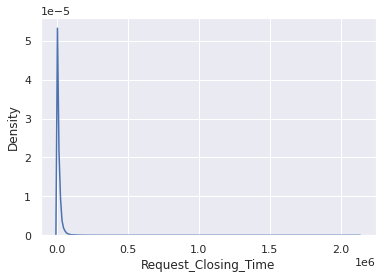

In [37]:
# Let us visualize graphically the average Request_Closing_Time
sns.set()
sns.distplot(df.Request_Closing_Time, hist= False)
plt.show()

#### 6. Identify significant variables by performing a statistical analysis using p-values and chi-square values (Optional)

Shapiro- Wilk Test of Normality<br>**H0: Request_Closing_Time feature is normal.**

In [38]:
# Check for nomality of Age
# Shapiro- Wilk Test
from scipy.stats import shapiro
stat, p= shapiro(df.Request_Closing_Time)
print(stat, p)

0.5136188268661499 0.0


##### <span style='color:green'>Observation:<br><span style='color:green'>If the P value (0.0) returned is less than 0.05, then the null hypothesis is rejected and there is evidence that the data is not from a normally distributed population. Now let's check for QQ Plots.

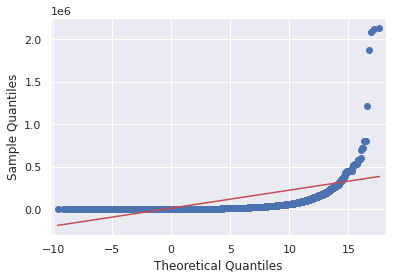

In [39]:
import statsmodels.api as sm
import pylab
sm.qqplot(df.Request_Closing_Time, loc = 4, scale = 3, line='s')
pylab.show()

##### <span style='color:green'>Observations:<br><span style='color:green'>- *This QQ plot shows that that age column is not normally distributed*.<br><span style='color:green'>- To check whether the average response time across complaint types is similar or not (overall), we have to use a non-parametric test, i.e., the Kruskal-Wallis test.

##### Kruskal Wallis  H Test
*__Fail to Reject H0:__ All sample distributions are equal.*<br>*__Reject H0:__ One or more sample distributions are not equal.*

In [40]:
Complaint_Types= df.Complaint_Type.unique()

In [41]:
len(Complaint_Types)

23

In [42]:
new= []
for i in Complaint_Types:
  new.append(df.loc[df['Complaint_Type']== i]['Request_Closing_Time'].ravel())

In [43]:
new[20]

array([27090., 37381.,  9736., 24686.,  4073., 10628., 30818.,  1901.])

In [44]:
from scipy.stats import kruskal
# compare samples
stat, p = kruskal(new[0],new[1], new[2],new[3], new[4], new[5], new[6], new[7], new[8], new[9], new[10], new[11], new[12], new[13], new[14], new[15], new[16], new[17], new[18], new[19],new[20], new[21], new[22])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=11988.269, p=0.000
Different distributions (reject H0)


#### <span style='color:green'>Observation:<br><span style='color:green'>- *So,  we reject the H0, that means average response time across complaint types are not similar*

#### Chi-Squared Test of independence
   ##### Let us see whether the type of complaint or service requested and location related

- **H0:There is no statistically significant relationship between City and Complaint Type.**
- **Ha:There is a statistically significant relationship between City and Complaint Type.**

In [45]:
# Contingency Table for complaints
contingency_table = pd.crosstab(df['City'],df['Complaint_Type'], margins= True)
contingency_table.head()

Complaint_Type,Agency Issues,Animal Abuse,Animal in a Park,Bike/Roller/Skate Chronic,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Graffiti,Homeless Encampment,...,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Panhandling,Posting Advertisement,Squeegee,Traffic,Urinating in Public,Vending,All
City,,,,,,,,,,,,,,,,,,,,,
ARVERNE,0,46,0,0,50,32,2,1,1,4,...,2,29,10,1,0,0,1,1,1,259
ASTORIA,0,170,0,16,3436,426,5,43,4,32,...,64,409,236,2,3,0,60,10,57,7991
Astoria,0,0,0,0,159,14,0,0,0,0,...,0,145,0,0,0,0,0,0,0,905
BAYSIDE,0,53,0,0,514,231,2,1,3,2,...,4,17,24,0,0,0,9,0,2,1550
BELLEROSE,0,15,0,1,138,120,2,1,0,1,...,1,13,11,1,1,0,9,1,0,487


In [46]:
contingency_table.shape

(55, 24)

In [47]:
contingency_table.iloc[0:5][0:24].values

array([[   0,   46,    0,    0,   50,   32,    2,    1,    1,    4,    0,
          62,    2,   14,    2,   29,   10,    1,    0,    0,    1,    1,
           1,  259],
       [   0,  170,    0,   16, 3436,  426,    5,   43,    4,   32,    4,
        1340, 1653,   21,   64,  409,  236,    2,    3,    0,   60,   10,
          57, 7991],
       [   0,    0,    0,    0,  159,   14,    0,    0,    0,    0,    0,
         277,  310,    0,    0,  145,    0,    0,    0,    0,    0,    0,
           0,  905],
       [   0,   53,    0,    0,  514,  231,    2,    1,    3,    2,    0,
         638,   47,    3,    4,   17,   24,    0,    0,    0,    9,    0,
           2, 1550],
       [   0,   15,    0,    1,  138,  120,    2,    1,    0,    1,    1,
         132,   38,    1,    1,   13,   11,    1,    1,    0,    9,    1,
           0,  487]])

In [48]:
f_obs= []
for i in range(0, contingency_table.shape[0]-1):
    f_obs.append(contingency_table.iloc[i][0:24].values)
f_obs= np.array(f_obs)
f_obs[0:5]

array([[   0,   46,    0,    0,   50,   32,    2,    1,    1,    4,    0,
          62,    2,   14,    2,   29,   10,    1,    0,    0,    1,    1,
           1,  259],
       [   0,  170,    0,   16, 3436,  426,    5,   43,    4,   32,    4,
        1340, 1653,   21,   64,  409,  236,    2,    3,    0,   60,   10,
          57, 7991],
       [   0,    0,    0,    0,  159,   14,    0,    0,    0,    0,    0,
         277,  310,    0,    0,  145,    0,    0,    0,    0,    0,    0,
           0,  905],
       [   0,   53,    0,    0,  514,  231,    2,    1,    3,    2,    0,
         638,   47,    3,    4,   17,   24,    0,    0,    0,    9,    0,
           2, 1550],
       [   0,   15,    0,    1,  138,  120,    2,    1,    0,    1,    1,
         132,   38,    1,    1,   13,   11,    1,    1,    0,    9,    1,
           0,  487]])

In [49]:
from scipy import stats
stats.chi2_contingency(f_obs)[0:3]

(145971.80461890678, 0.0, 1219)

#### <span style='color:green'>Observations:
<span style='color:green'>**P-value is approximately zero. So we have evidence against the null hypothesis.**

<span style='color:green'>With a p-value < 0.05 , we can reject the null hypothesis at 95% confidence Interval. There is definitely some sort of relationship between 'City' and the 'Complaint_Type' column. We don't know what this relationship is, but we do know that these two variables are not independent of each other.

Thank you